In [1]:
from supervised_training import generate_buffer
from training import train
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

def moving_average(x, w=100):
    return np.convolve(x, np.ones(w), "valid") / w

def draw_log(version):
    df = pd.read_csv(f"model_logs/{version}.csv")
    for k,v in df.items():
        if k == "iteration":
            iterations = v
            continue
        plt.figure(figsize=(20,6))
        plt.grid("black")
        plt.plot(iterations, v)
        averaging_amount = len(iterations)//20
        if(averaging_amount > 5):
            offset = averaging_amount // 2
            plt.plot(iterations[offset:-averaging_amount + 1 + offset], moving_average(v, w=len(iterations)//20))
        plt.title(k)
        plt.show()

# Testing
This file contains a selection of interesting training configurations based on the given model 17.1

### Train unsupervised

v17.1
Training Model
+------------------- Summary ------------------+
|                                              |
+------------------- Conv2d -------------------+
| layers.0.weight       | [16, 2, 3, 3]        |
| layers.0.bias         | [16]                 |
+-----------------------+----------------------+
|                     ReLU                     |
+------------------- Conv2d -------------------+
| layers.2.weight       | [32, 16, 3, 3]       |
| layers.2.bias         | [32]                 |
+-----------------------+----------------------+
|                     ReLU                     |
+------------------- Conv2d -------------------+
| layers.4.weight       | [64, 32, 5, 5]       |
| layers.4.bias         | [64]                 |
+-----------------------+----------------------+
|                     ReLU                     |
|                   Flatten                    |
+------------------- Linear -------------------+
| layers.7.weight       | [64, 1024]           |

100%|██████████| 500000/500000 [3:03:14<00:00, 45.48it/s]   


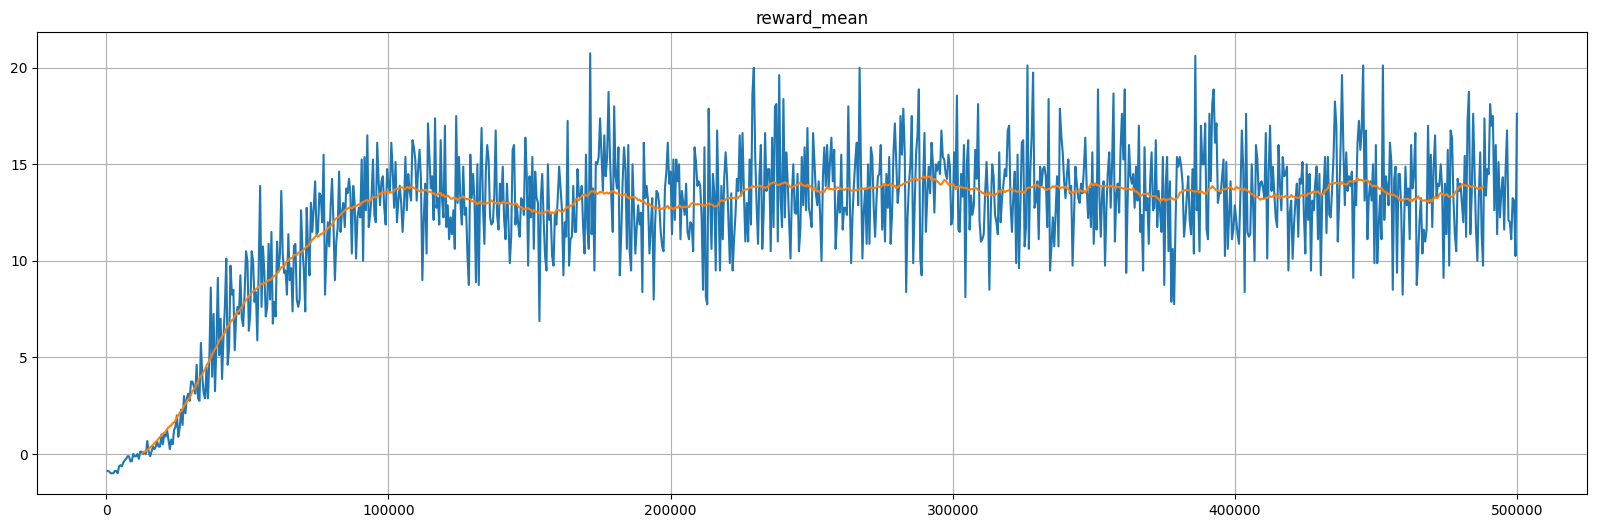

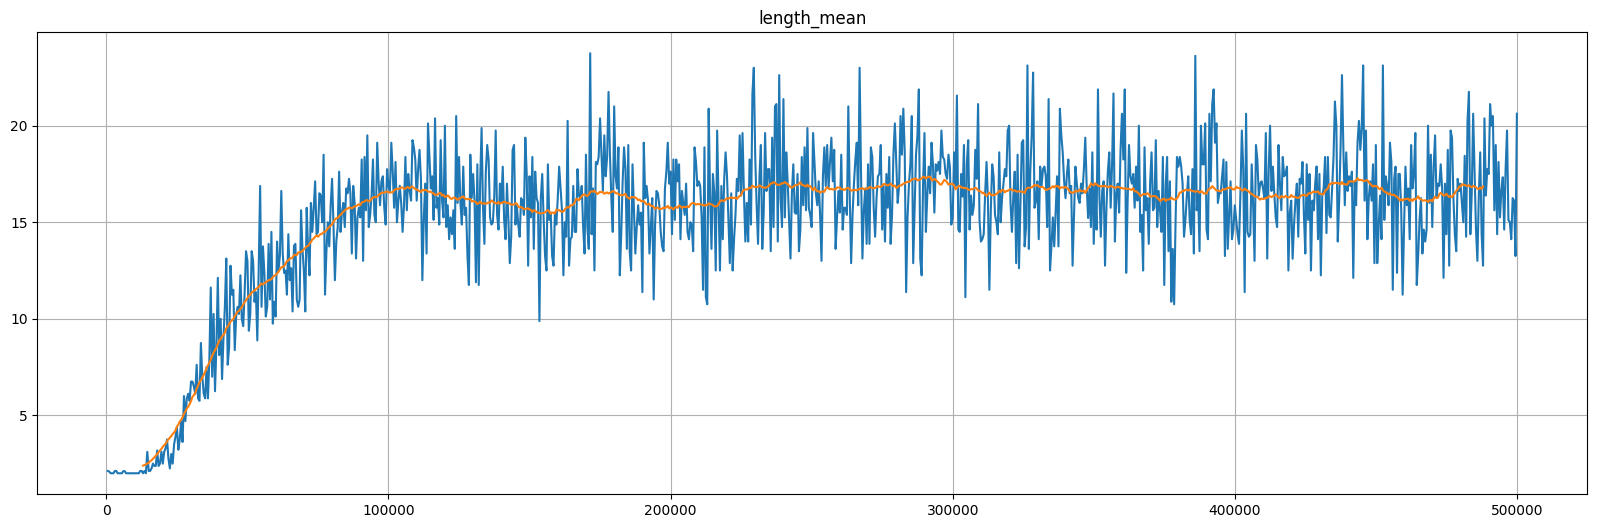

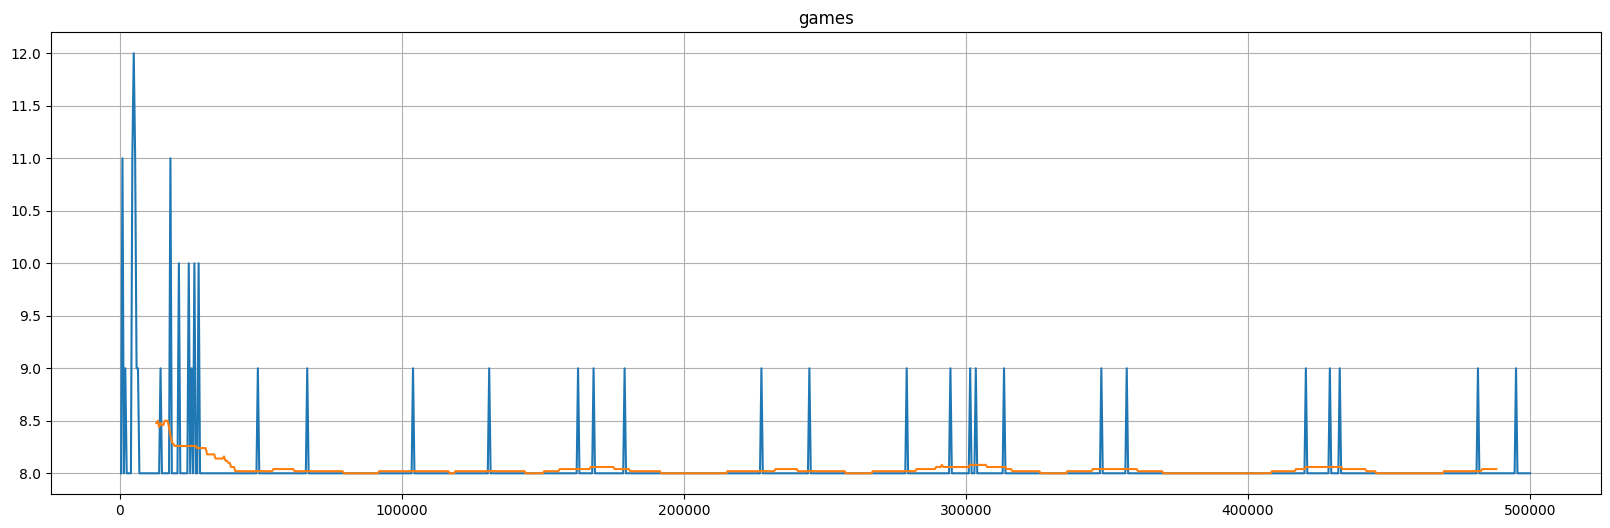

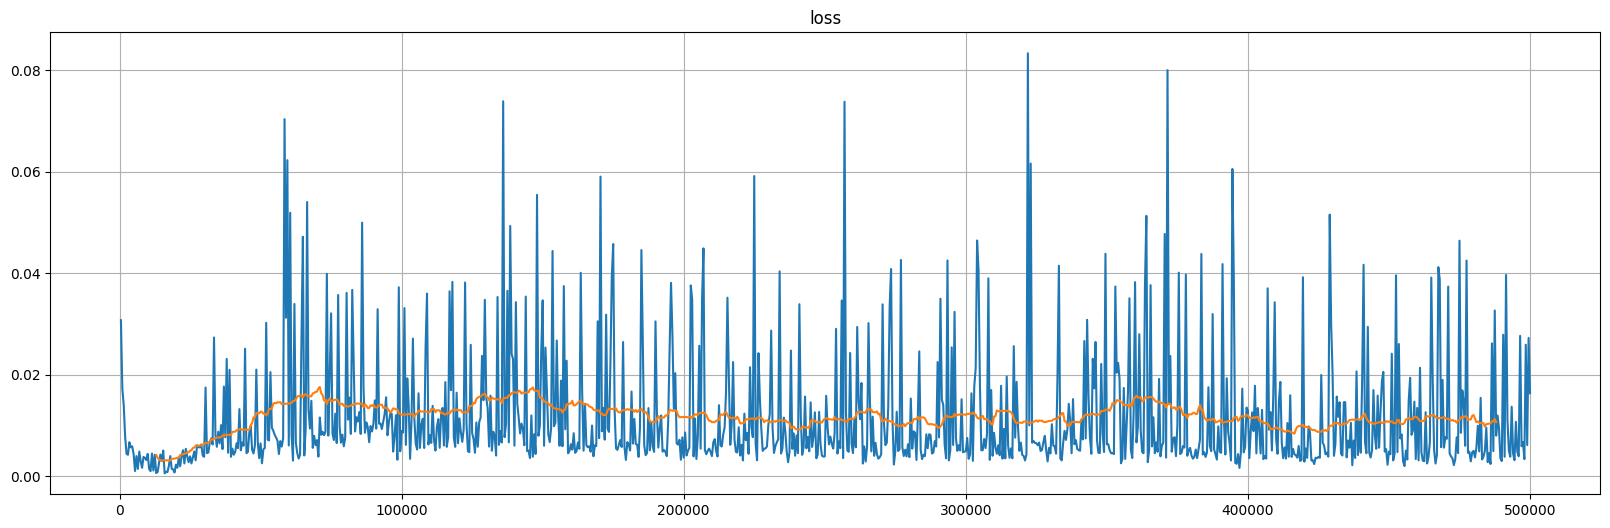

In [2]:
version = "v17.1"
train(version=version, pretrained_buffer_iteration=1, episodes=500000)
draw_log(version=version)

### Train supervised

Generate buffer for v17.2


800it [00:27, 29.11it/s]


Buffer size 79900 filled in 27.51s
v17.2
Training Model
+------------------- Summary ------------------+
|                                              |
+------------------- Conv2d -------------------+
| layers.0.weight       | [16, 2, 3, 3]        |
| layers.0.bias         | [16]                 |
+-----------------------+----------------------+
|                     ReLU                     |
+------------------- Conv2d -------------------+
| layers.2.weight       | [32, 16, 3, 3]       |
| layers.2.bias         | [32]                 |
+-----------------------+----------------------+
|                     ReLU                     |
+------------------- Conv2d -------------------+
| layers.4.weight       | [64, 32, 5, 5]       |
| layers.4.bias         | [64]                 |
+-----------------------+----------------------+
|                     ReLU                     |
|                   Flatten                    |
+------------------- Linear -------------------+
| layers.7.we

100%|██████████| 500000/500000 [2:32:13<00:00, 54.74it/s]    


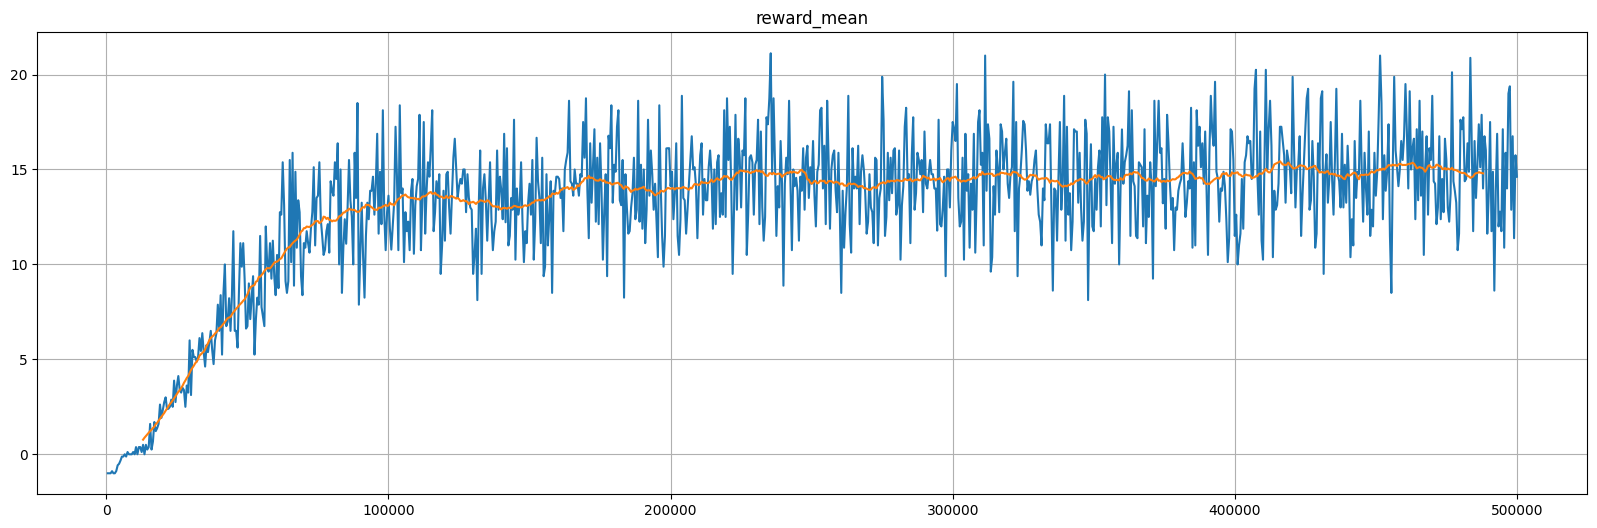

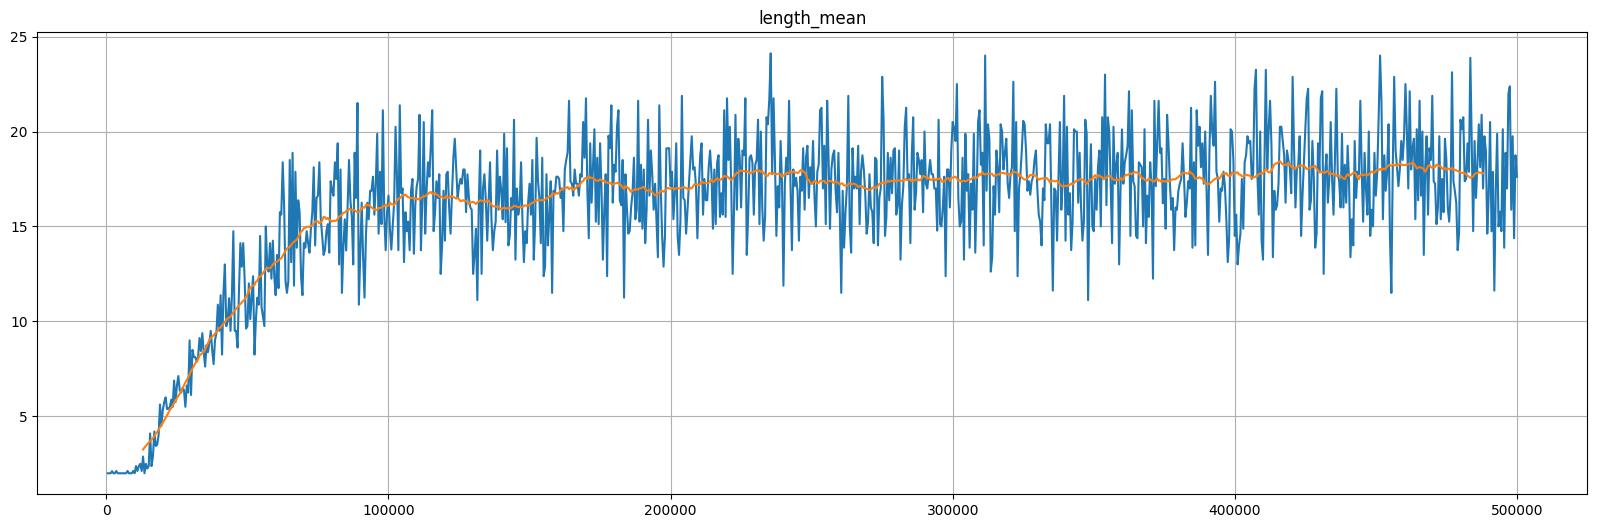

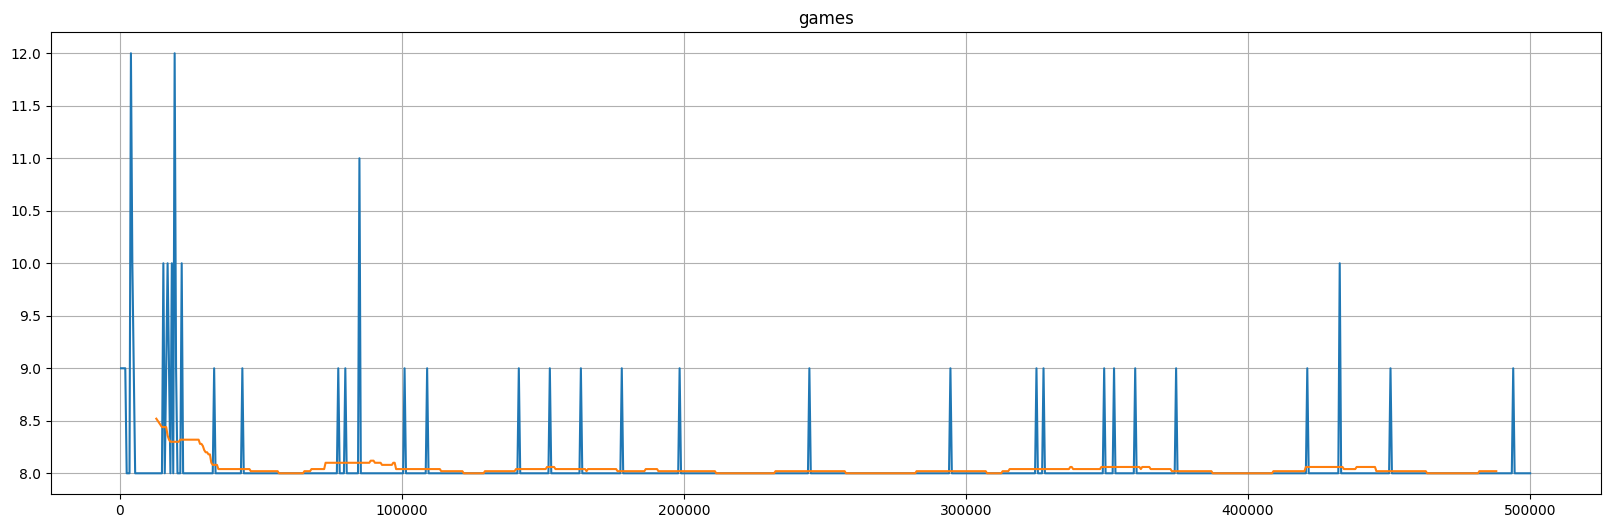

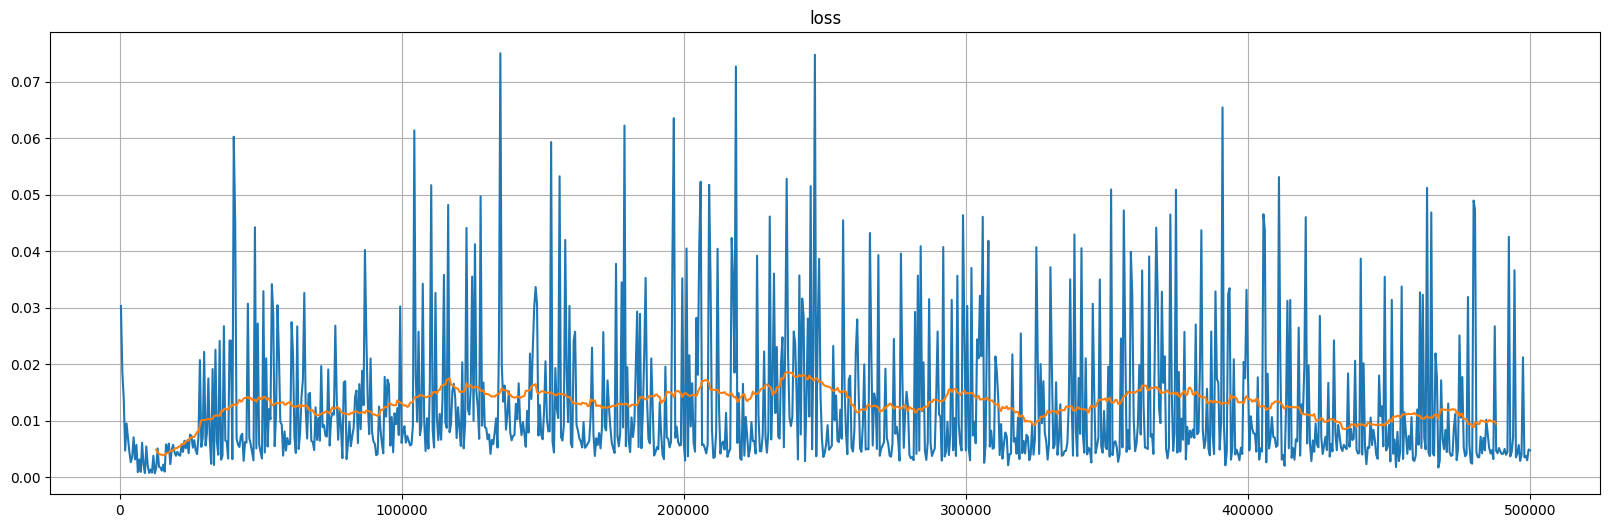

In [3]:
version = "v17.2"
generate_buffer(version=version)
train(version=version, pretrained_buffer_iteration=1, episodes=500000)
draw_log(version=version)

### Train Supervised with increased Buffersize

In [3]:
version = "v17.3"
generate_buffer(version=version, buffer_size=160000, n_games_training=200)
train(version=version, pretrained_buffer_iteration=1, episodes=350000)
draw_log(version=version)

Generate buffer for v17.3


800it [00:57, 13.96it/s]


Buffer size 159800 filled in 57.35s
v17.3
Training Model
+------------------- Summary ------------------+
|                                              |
+------------------- Conv2d -------------------+
| layers.0.weight       | [16, 2, 3, 3]        |
| layers.0.bias         | [16]                 |
+-----------------------+----------------------+
|                     ReLU                     |
+------------------- Conv2d -------------------+
| layers.2.weight       | [32, 16, 3, 3]       |
| layers.2.bias         | [32]                 |
+-----------------------+----------------------+
|                     ReLU                     |
+------------------- Conv2d -------------------+
| layers.4.weight       | [64, 32, 5, 5]       |
| layers.4.bias         | [64]                 |
+-----------------------+----------------------+
|                     ReLU                     |
|                   Flatten                    |
+------------------- Linear -------------------+
| layers.7.w

 18%|█▊        | 64667/350000 [22:02<1:22:44, 57.47it/s] 

### Train Supervised with gamma = 0.999

### Train Unsupervised with gamma = 0.999